# Pooja_Keshri_Task-2
## Prediction using unsupervised Machine Learning

### Problem Statement:-
The target variable comprises of 3 different species of iris flower. Our motive is to classify the three different classes with the help of given features using Machine Learning Algorithms.

### Dataset Information:-
This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: Type of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.

### Attribute Information:-
* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

**class:**
*  Iris Setosa
*  Iris Versicolour
*  Iris Virginica

### We will be implementing the following steps to achieve the final result:-
* Importing the necessary Libraries.
* Importing the Dataset.
* Exploratory Data Analysis.
* Dividing the data into test and train datasets.
* Building the model.
* Evaluating the performance.

### Importing Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans


### Loading DataSet

In [67]:
data=pd.read_csv("https://raw.githubusercontent.com/KeshriPooja/The-Sparks-Foudation/main/Task2/Iris.csv")

In [68]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


* Id column is a unique feature so we have to drop ID
* We have to apply clustering algorithm so removing the target variable.

In [ ]:
data.drop('Id',axis=1,inplace=True)
data1=data.iloc[:,:-1]

### Description of Dataset

In [11]:
data1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


So There are  150 samples in Iris dataset which conclude following information:

* Iris Flower sepal length ranges from 4.3 to 7.9 cm and the average length is 5.8 cm.
* Irsi Flower sepal width ranges from 2 to 4.4 cm and the average width is 3.05 cm.
* Iris Flower petal length ranges from 1 to 5.1 cm and the average length is 3.75 cm.
* Iris Flower petal width ranges from 0.1 to 2.5 cm and the average width is 1.19 cm.

array([[<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>]], dtype=object)

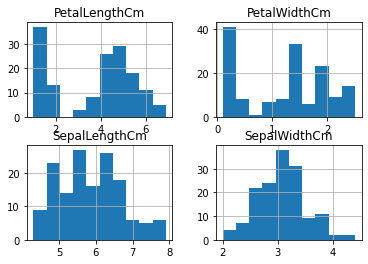

In [12]:
data.hist()


### Visualising the data using seaborn library:-
There are different types of plots like bar plot, box plot, scatter plot etc.

Scatter plot is very useful when we are analyzing the relation ship between 2 features on x and y axis.

In seaborn library we have pairplot function which is very useful to scatter plot all the features at once instead of plotting them individually.


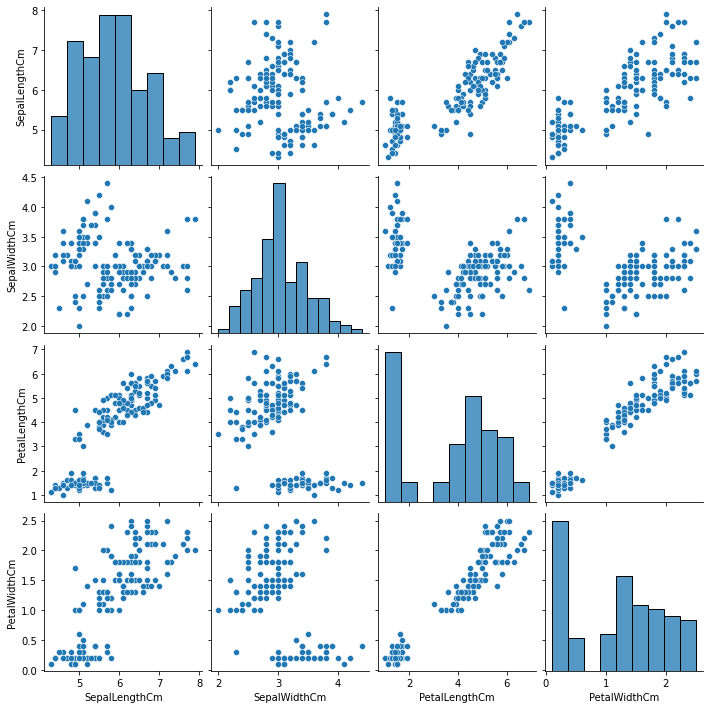

In [15]:
# Using Pair plot we can visualize relationship between of all the numeric features with each other.
sns.pairplot(data1)

### Correlation Analysis

In [17]:
data1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

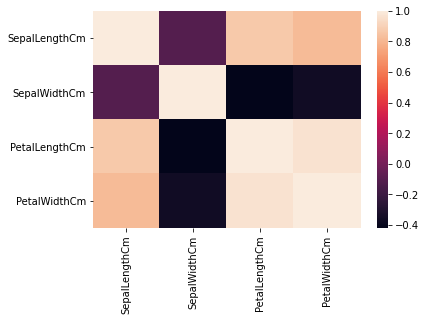

In [18]:
sns.heatmap(data1.corr())

From the correlation analysis we can see that Sepal length, petal length and petal width have high correlation so we can take only one feature among them and drop the remaining feature.

In [51]:
data1.drop(['PetalLengthCm','PetalWidthCm'],axis=1,inplace=True)

In [52]:
data1

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


### Model Building - KMeans

We apply Kmeans clustering algorithm to cluster tha data into different groups.

In [53]:
cluster_range = range(1, 11)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( data1 )
    cluster_errors.append(clusters.inertia_)# clusters.inertia_ is basically cluster error here.

In [54]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[:]

,num_clusters,cluster_errors
0,1,130.180933
1,2,57.982406
2,3,37.123702
3,4,27.958710
4,5,20.996991
5,6,17.238695
6,7,14.692192
7,8,12.791786
8,9,11.213876
9,10,9.542326


### Elbow Method 

Here i am applying elbow method to check optimal number of cluster.

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

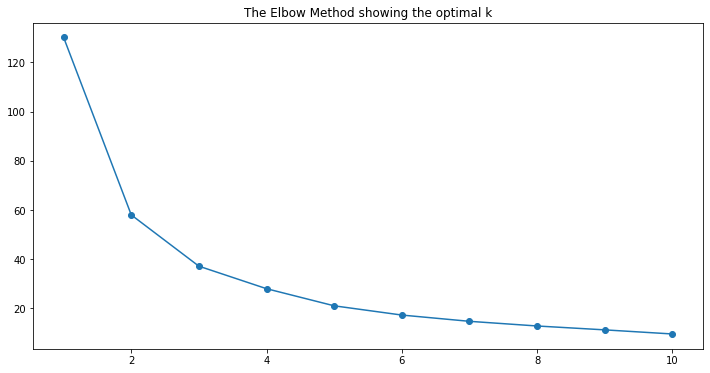

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

plt.title('The Elbow Method showing the optimal k')

**From the elbow method we can see clearly that 3 clusters are optimal for the iris dataset.**


In [59]:
k_range = range(2, 11)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(data1)
    scores.append(metrics.silhouette_score(data1, km.labels_))

In [60]:
scores

[0.4635854719215509,
 0.4434693231245127,
 0.4226026685130101,
 0.4110409945577269,
 0.39523038927984677,
 0.39675991702493857,
 0.3929459556119197,
 0.40414004097091455,
 0.41199809679239663]

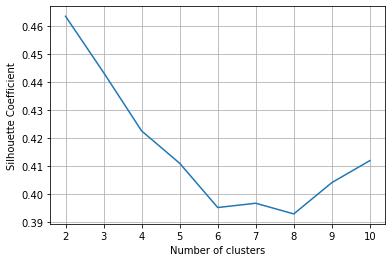

In [61]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [62]:
kmeans =KMeans(n_clusters=3).fit(data1)

In [63]:
kmeans.cluster_centers_[:, :]

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.418     ]])

### Visualizing Each Cluster

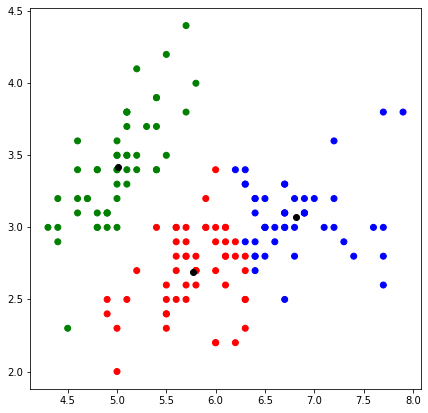

In [64]:
color_map={0:'r',1:'b',2:'g'}
label_color=[color_map[l] for l in kmeans.labels_]
plt.figure(figsize=(7,7))
plt.scatter(data1.iloc[:,0],data1.iloc[:,1],c=label_color,cmap='Spectral')
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], c = 'black', label = 'Centroids')